<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1iLbdUKIrQByZ_yJFKOonV2VK4UL1aMvA" width = "400" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [23]:
# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")
data.head(12)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

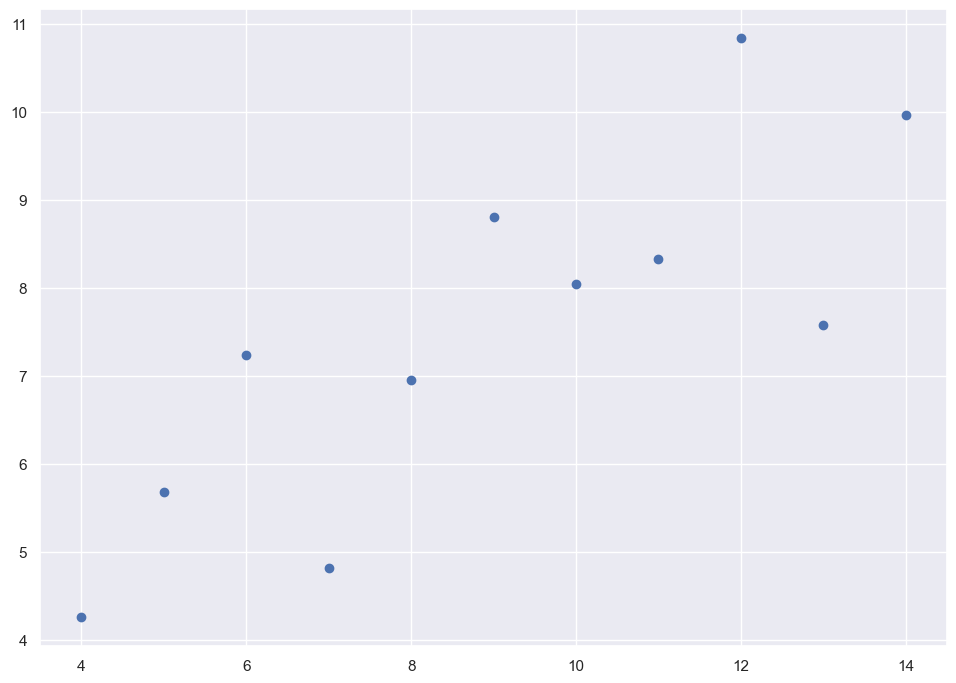

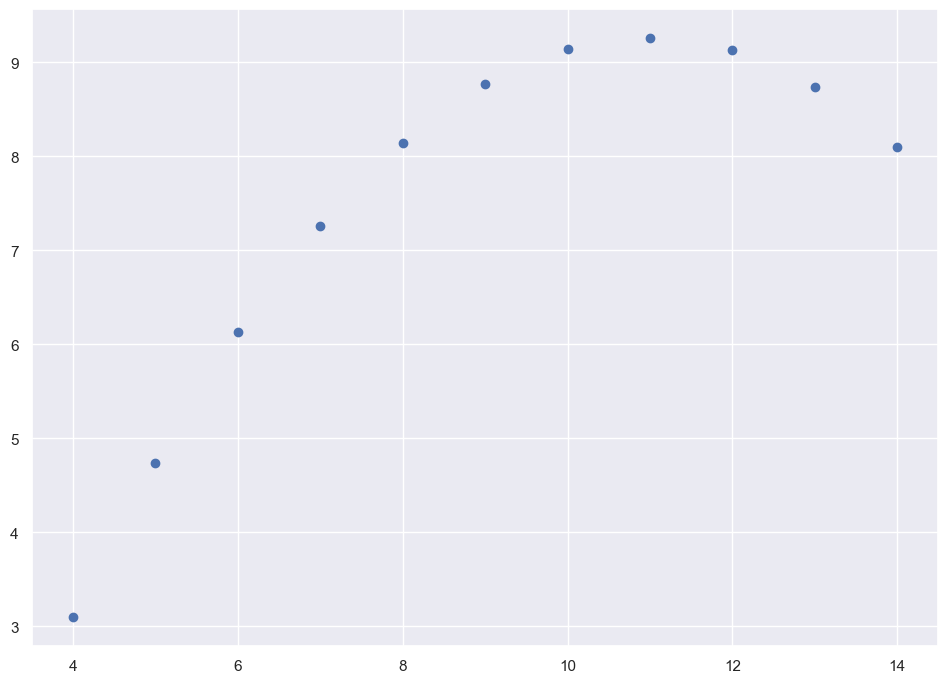

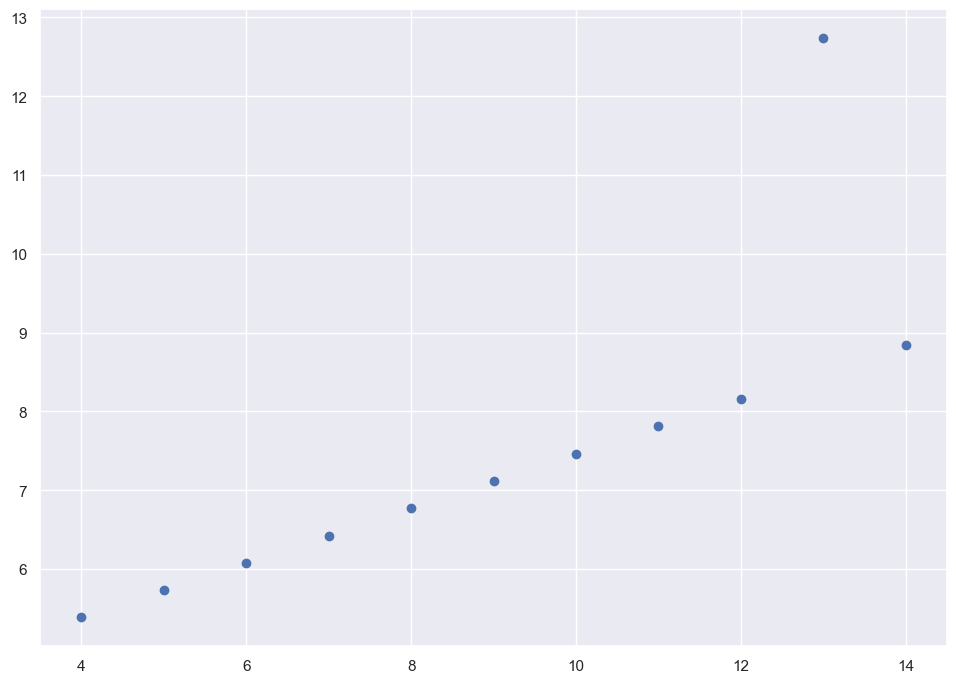

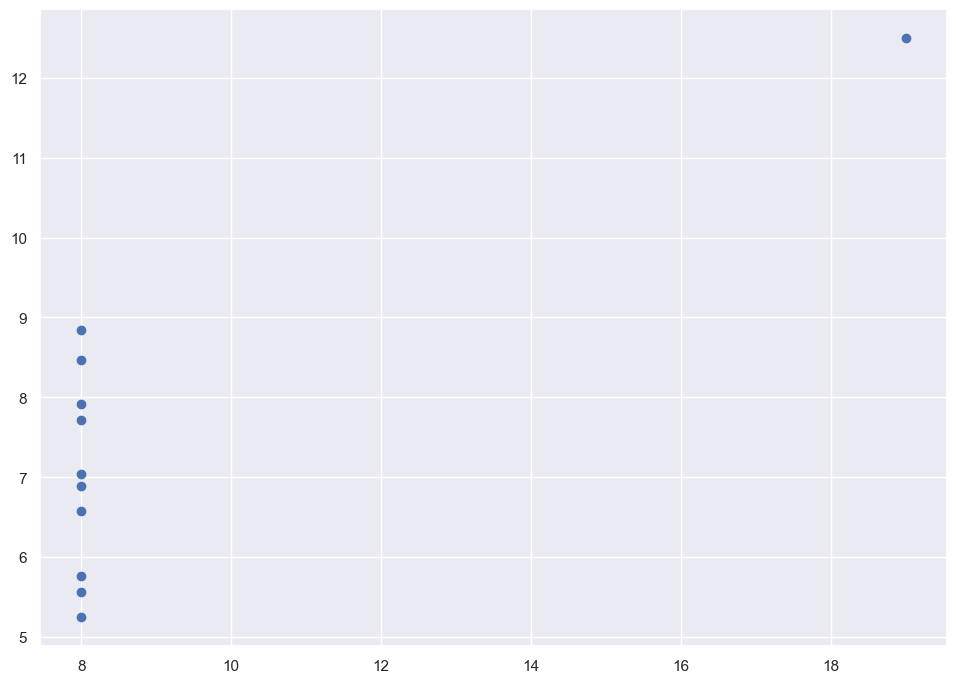

In [17]:
lista = list(data["dataset"].unique())
for i in lista:
    x = []
    y = []
    contador = 0
    for j in data["dataset"]:
        if(i == j):
            x.append(data.iloc[contador]["x"])
            y.append(data.iloc[contador]["y"])
        contador+= 1
    plt.scatter(x,y)
    plt.show()

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando `describe` para cada grupo. Interprete.

In [21]:
contador = 0
for i in lista:
    aux = contador
    for j in data["dataset"]:
        if(i == j):
            contador += 1
    print(data.iloc[aux:contador].describe())
#ambos ejes tienen las mismas medias pero distintas desviaciones.

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max    19.000000  12

3. Realice un ajuste lineal (con **sklearn**) y calcule los resultados de las métricas para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

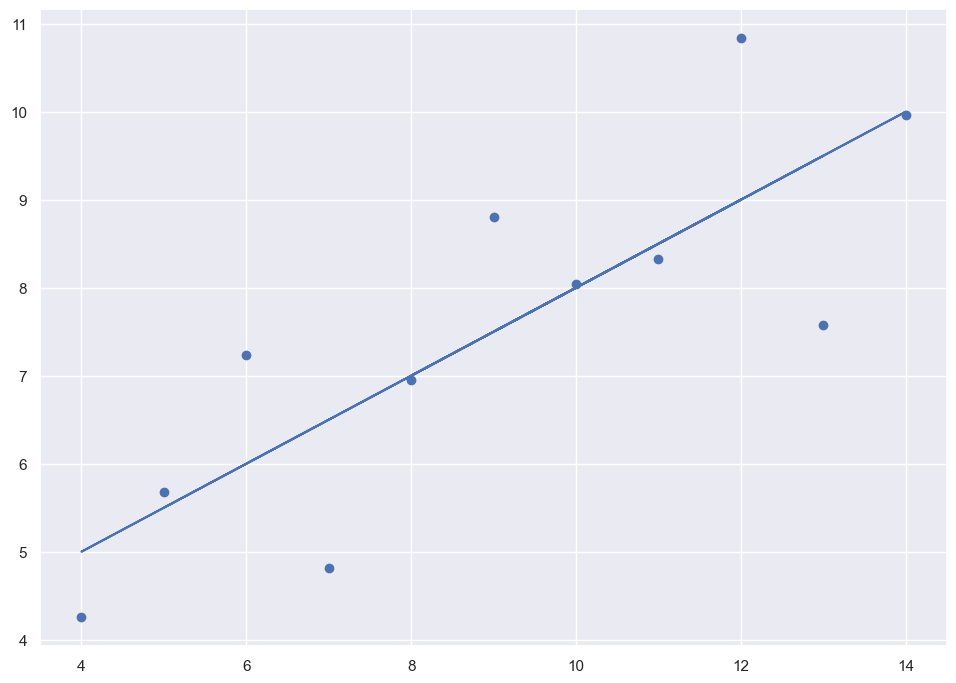

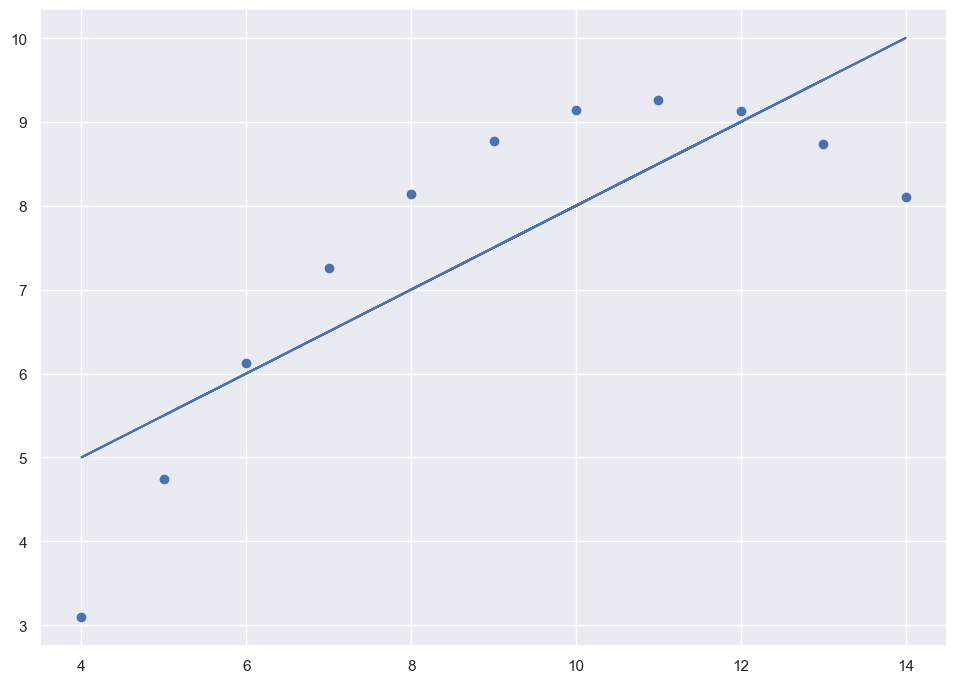

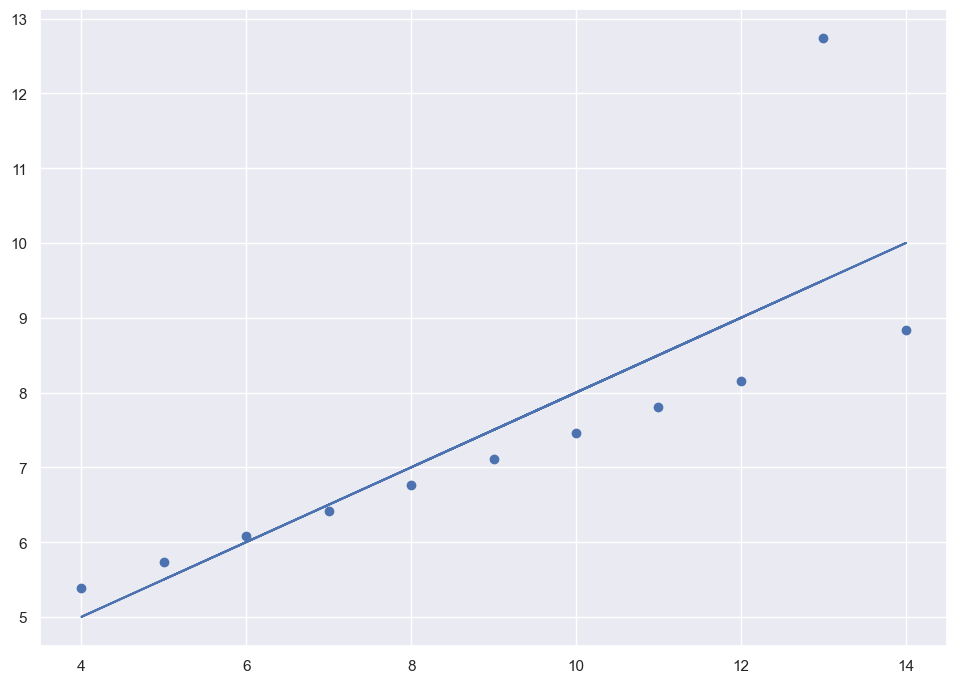

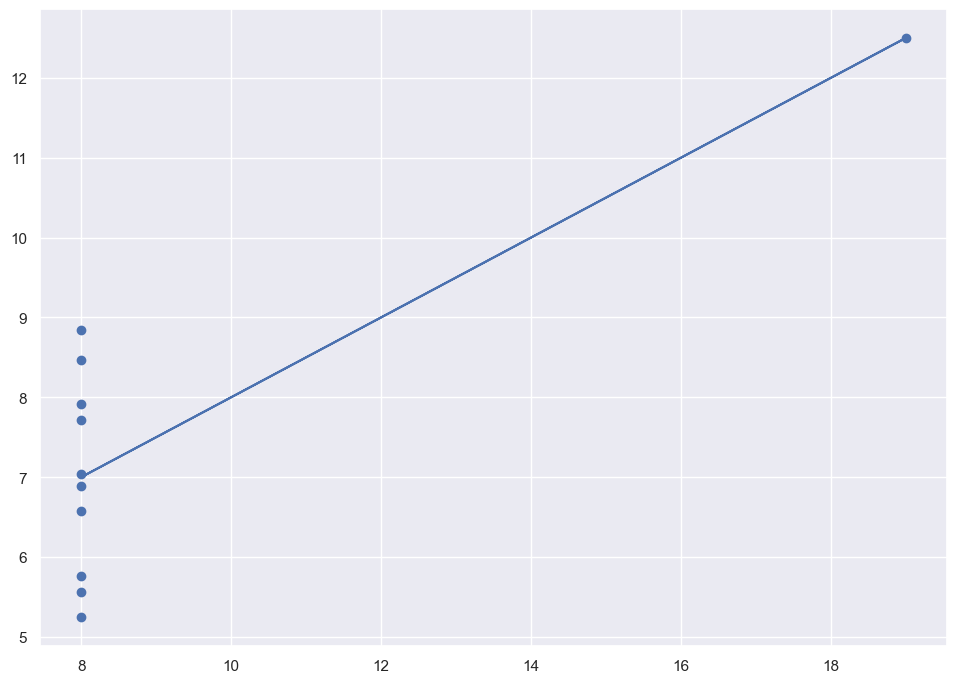

In [49]:
for i in lista:
    x = []
    y = []
    contador = 0
    for j in data["dataset"]:
        if(i == j):
            x.append([data.iloc[contador]["x"]])
            y.append(data.iloc[contador]["y"])
        contador+= 1
    model = LinearRegression()
    model.fit(x,y)
    y_p = model.predict(x)
    plt.scatter(x,y)
    plt.plot(x,y_p)
    plt.show()

4. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

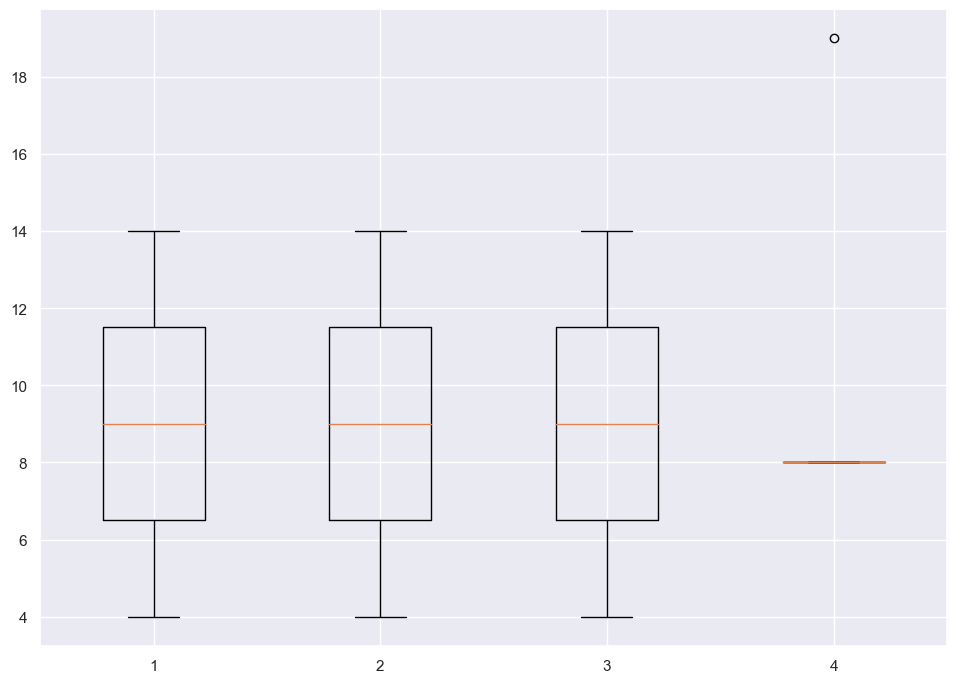

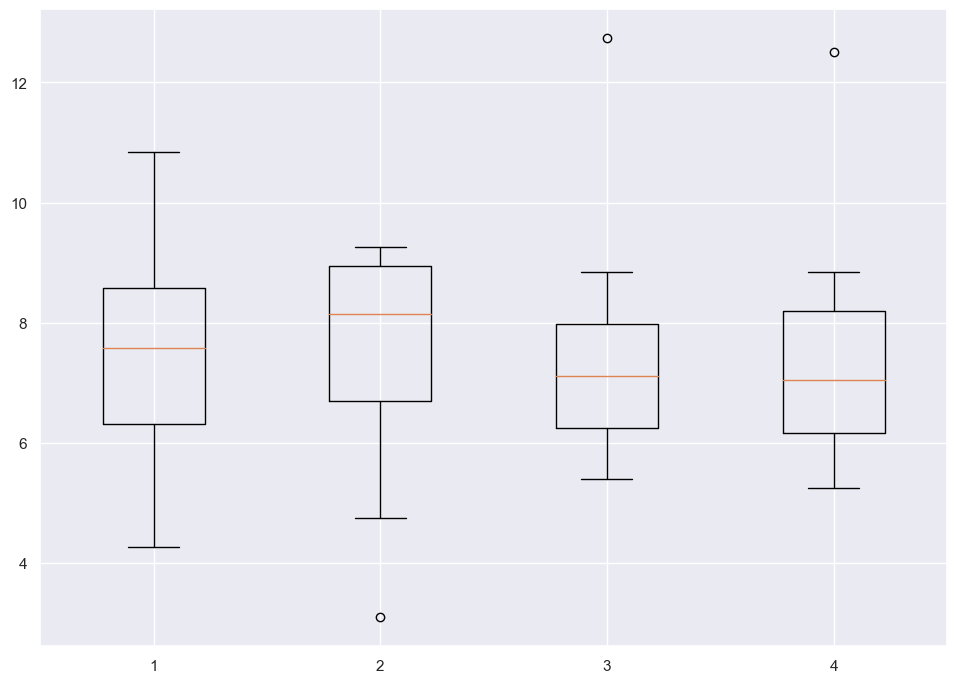

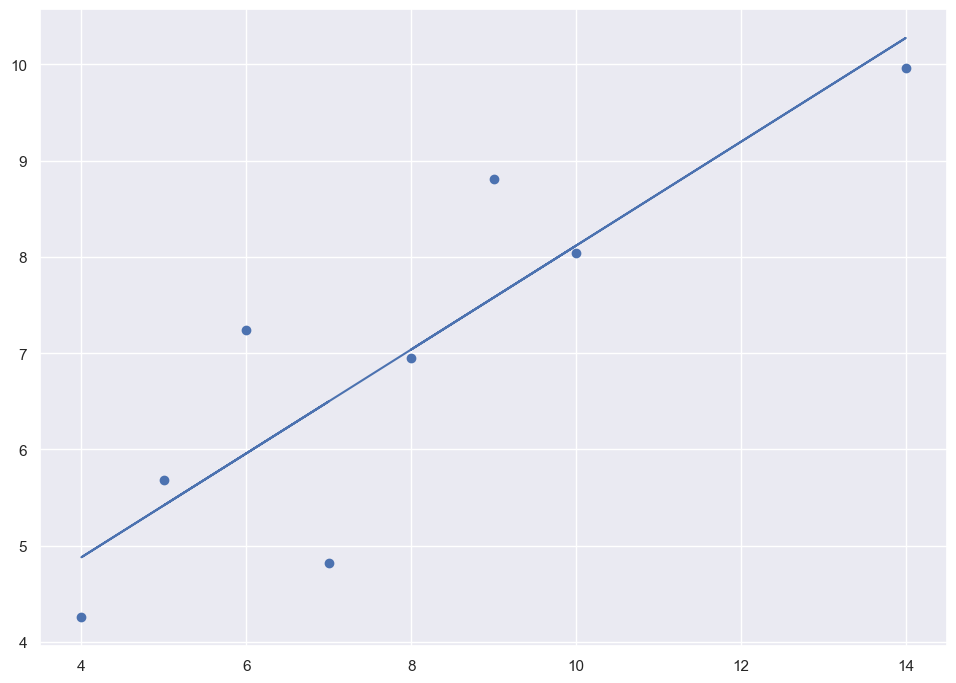

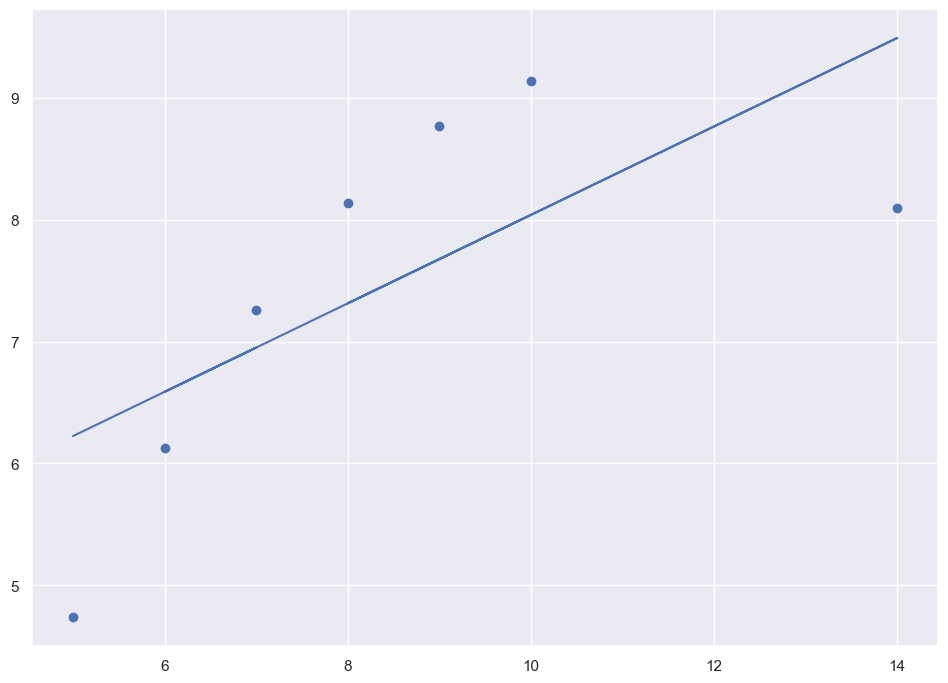

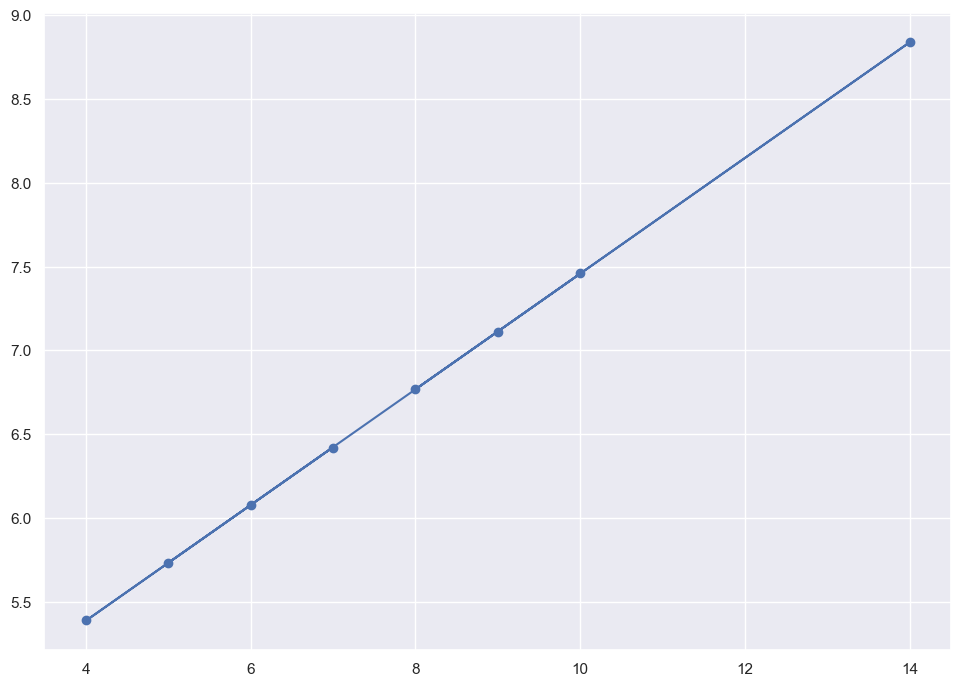

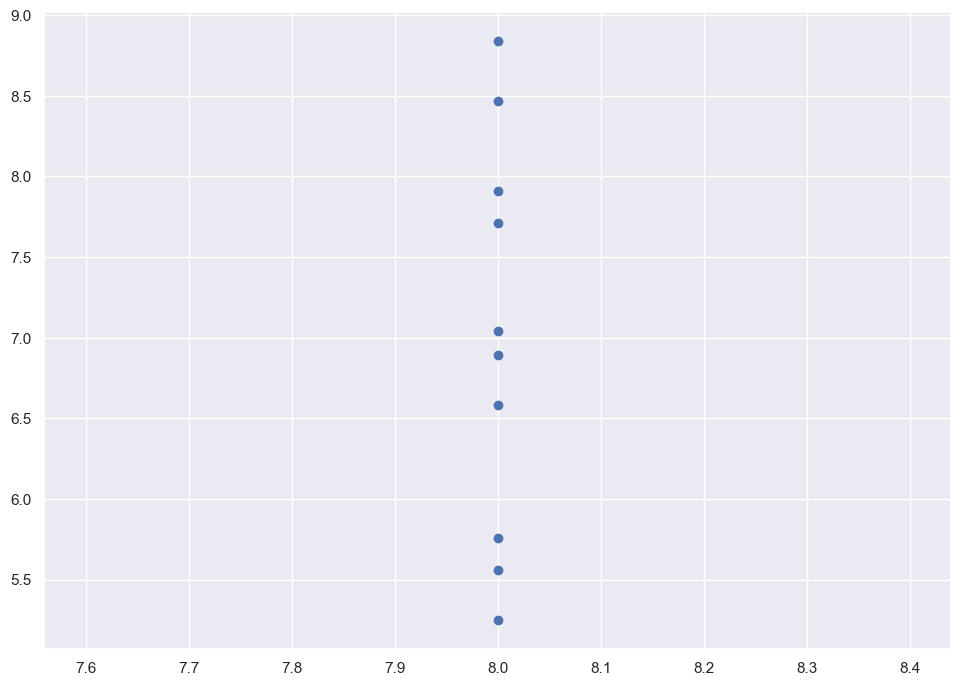

In [64]:
x2 = []
y2 = []
for i in lista:
    x = []
    y = []
    contador = 0
    for j in data["dataset"]:
        if(i == j):
            x.append(data.iloc[contador]["x"])
            y.append(data.iloc[contador]["y"])
        contador+= 1
    x2.append(x)
    y2.append(y)
plt.boxplot(x2)
plt.show()
plt.boxplot(y2)
plt.show()


for i in lista:
    x = []
    y = []
    contador = 0
    for j in data["dataset"]:
        if(i == j):
            x.append([data.iloc[contador]["x"]])
            y.append(data.iloc[contador]["y"])
        contador+= 1
    aux_cont = 0
    for i in x:
        for j in i:
            if j > 10:
                x.pop(aux_cont)
                y.pop(aux_cont)
        aux_cont += 1
    aux_cont = 0
    for i in y:
        if i < 4 or i > 12:
            x.pop(aux_cont)
            y.pop(aux_cont)
        aux_cont += 1
    model = LinearRegression()
    model.fit(x,y)
    y_p = model.predict(x)
    plt.scatter(x,y)
    plt.plot(x,y_p)
    plt.show()
#viendo los boxplot se hizo un for para x e y donde se eliminan los outliers y se ajusta el arreglo para que no haya problemas de dimension.